# Airlines Customer Value Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
warnings.filterwarnings('ignore')

# menhhapus limit max column
pd.set_option('display.max_columns', None)

%matplotlib inline

# Load and Describe Data

-------------

## Load Data

In [2]:
dfraw = pd.read_csv('https://drive.google.com/uc?export=download&id=1wQdWcsCZdeStbnx-bx1R2eGMaabjZ9_m')
dfraw.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [3]:
# Change the column into lowercase
dfraw.columns = dfraw.columns.str.lower()

| Feature Name | Description |
| --- | --- |
| member_no   | Member ID |
| ffp_date    | Frequent Flyer Program Join Date |
| first_flight_date    | First Flight Date |
| gender | Gender |
| ffp_tier | Frequent Flyer Program Tier |
| work_city | Work City |
| work_province | Work Proviince |
| work_country | Work Country |
| age | Customer Age |
| load_time | Date data was taken |
| flight_count | Number of customer flights |
| bp_sum | Total basic integral |
| sum_yr_1 | Fare Revenue|
| sum_yr_2 |  Votes Prices |
| seg_km_sum | Total distance (km) flights that have been done |
| last_flight_date | Last Flight Date |
| last_to_end | last flight time to last flight order interval |
| avg_internal | Average time distance |
| max_interval | Maximum time distance |
| exchange_count | Number of redemptions |
| avg_discount | The average discount that customers get |
| points_sum | The number of points earned by the customer |
| point_notflight | Points not used by members |

## Describe Data

In [4]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

1. There are 23 features with 62,988 rows of data
2. Features with time information (date) need to be changed from the object to datetime data type
3. The `member_no` feature should be changed from a numeric data type to an object because the number in question is only an ID, not a mathematical operation.
4. The `age` feature should be changed from float to integer data type
5. There are several features that have null values

In [5]:
#Convert int to object
dfraw['member_no'] = dfraw['member_no'].astype(str)

Because previously when changing the data type to datetime there was an error as below,  
**ParserError: day is out of range for month: 2014/2/29 0:00:00 present at position 65**

So, we will first check the value in question.

In [6]:
dfraw[dfraw.last_flight_date.str.contains('2014/2/29')]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,2,276,0.0,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


It turns out that there is indeed a different date format written in the `last_flight_date` feature. There are 421 out of 62,988 data or only 0.006%, so we can delete this input error.

In [7]:
dfraw.drop(dfraw[dfraw.last_flight_date.str.contains('2014/2/29')].index, inplace = True)

In [8]:
# Convert object to datetime
cols = ['ffp_date', 'first_flight_date', 'load_time','last_flight_date']
for col in cols:
    dfraw[col] = pd.to_datetime(dfraw[col])

In [9]:
# Checking null value
dfraw.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2255
work_province        3226
work_country           25
age                   419
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [10]:
dfraw.dtypes

member_no                    object
ffp_date             datetime64[ns]
first_flight_date    datetime64[ns]
gender                       object
ffp_tier                      int64
work_city                    object
work_province                object
work_country                 object
age                         float64
load_time            datetime64[ns]
flight_count                  int64
bp_sum                        int64
sum_yr_1                    float64
sum_yr_2                    float64
seg_km_sum                    int64
last_flight_date     datetime64[ns]
last_to_end                   int64
avg_interval                float64
max_interval                  int64
exchange_count                int64
avg_discount                float64
points_sum                    int64
point_notflight               int64
dtype: object

1. There are 6 features; `work_city`, `work_province`, `work_country`, `age`, `sum_yr_1`, and `sum_yr_2` which have null values in them.
2. All features are deemed appropriate according to the data type.
3. For the `age` feature, because there are NA values, the data type will be changed when missing values are handled.

In [11]:
# Checking duplicated rows
dfraw.duplicated().sum()

0

In [12]:
# Categorize the features
num = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum', 'point_notflight']
cat = ['member_no','ffp_date', 'first_flight_date', 'gender', 'work_city', 'work_province', 'work_country', 'load_time', 'last_flight_date']

# Limit number after comma
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfraw[num].describe()

,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62567.000,62148.000,62567.000,62567.000,62016.000,62429.000,62567.000,62567.000,62567.000,62567.000,62567.000,62567.000,62567.000,62567.000
mean,4.102,42.481,11.814,10906.692,5352.328,5588.828,17095.441,177.090,67.775,165.887,0.319,0.722,12524.516,2.727
std,0.374,9.887,14.052,16351.868,8116.830,8707.793,20974.465,184.058,77.607,123.394,1.137,0.185,20524.415,7.361
min,4.000,6.000,2.000,0.000,0.000,0.000,368.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,35.000,3.000,2509.000,1005.750,768.000,4732.000,29.000,23.333,79.000,0.000,0.612,2764.000,0.000
50%,4.000,41.000,7.000,5681.000,2800.000,2756.000,9959.000,109.000,44.643,143.000,0.000,0.712,6303.000,0.000
75%,4.000,48.000,15.000,12797.000,6567.000,6815.000,21206.000,269.000,82.000,227.000,0.000,0.810,14249.000,1.000
max,6.000,110.000,213.000,505308.000,239560.000,234188.000,580717.000,731.000,728.000,728.000,46.000,1.500,985572.000,140.000


Overall, the dataset does not have a very wide data distribution. Even though there are several features that have big gap of min-max values, this seems reasonable if we compare it with cases in the real world where there are definitely people who fly frequently and on the other hand there are also people who rarely fly.  

Some things that may need attention are:
1. Most numerical features have Mean>Median values and Min-Max values which are quite far apart
2. The `age` feature looks abnormal where the maximum age value is 110 years
3. The `avg_discount` feature also seems to be abnormal, the maximum value is 1.5 or can be interpreted as 150% discount.
4. Fare revenue seen in the `sum_yr_1` and `sum_yr_2` features has a value of 0. This needs to be analyzed further.

In [13]:
dfraw[cat].describe()

,member_no,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date
count,62567,62567,62567,62564,60312,59341,62542,62567,62567
unique,62567,3068,3405,2,3225,1161,118,1,730
top,54993,2011-01-13 00:00:00,2013-02-16 00:00:00,Male,guangzhou,guangdong,CN,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,1,183,96,47806,9326,17395,57347,62567,959
first,NaN,2004-11-01 00:00:00,1905-12-31 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2012-04-01 00:00:00
last,NaN,2013-03-31 00:00:00,2015-05-30 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2014-03-31 00:00:00


1. Most of the data is about time (date/time) where things definitely vary which causes the unique value to count a lot. However, there is only 1 unique value in the load_time feature, which is the date the data was taken, that's 3/31/2014.
2. Most passengers come from China and are male.
3. It has been confirmed that there are no duplicate data or that all unique values for `member_no` are correct.
4. The first and last outputs are only visible for features of the datetime type.

--------

# EDA (Exploratory Data Analysis

--------

## Univariate Analysis

### Unique Values

In [14]:
dfraw['ffp_tier'].unique()

array([6, 5, 4])

There are 3 types of tiers; 4, 5, and 6.

In [15]:
dfraw['work_city'].unique()

array(['.', nan, 'Los Angeles', ..., 'BELLREGUARD', 'Danville',
       'lingshui'], dtype=object)

In [16]:
dfraw['work_province'].unique()

array(['beijing', 'CA', 'guizhou', ..., 'NOTARIO', 'TOPKPPI', 'JAWATIMUR'],
      dtype=object)

There are categorical features that require data cleaning in the form of generalizing string writing.

### Data Distribution

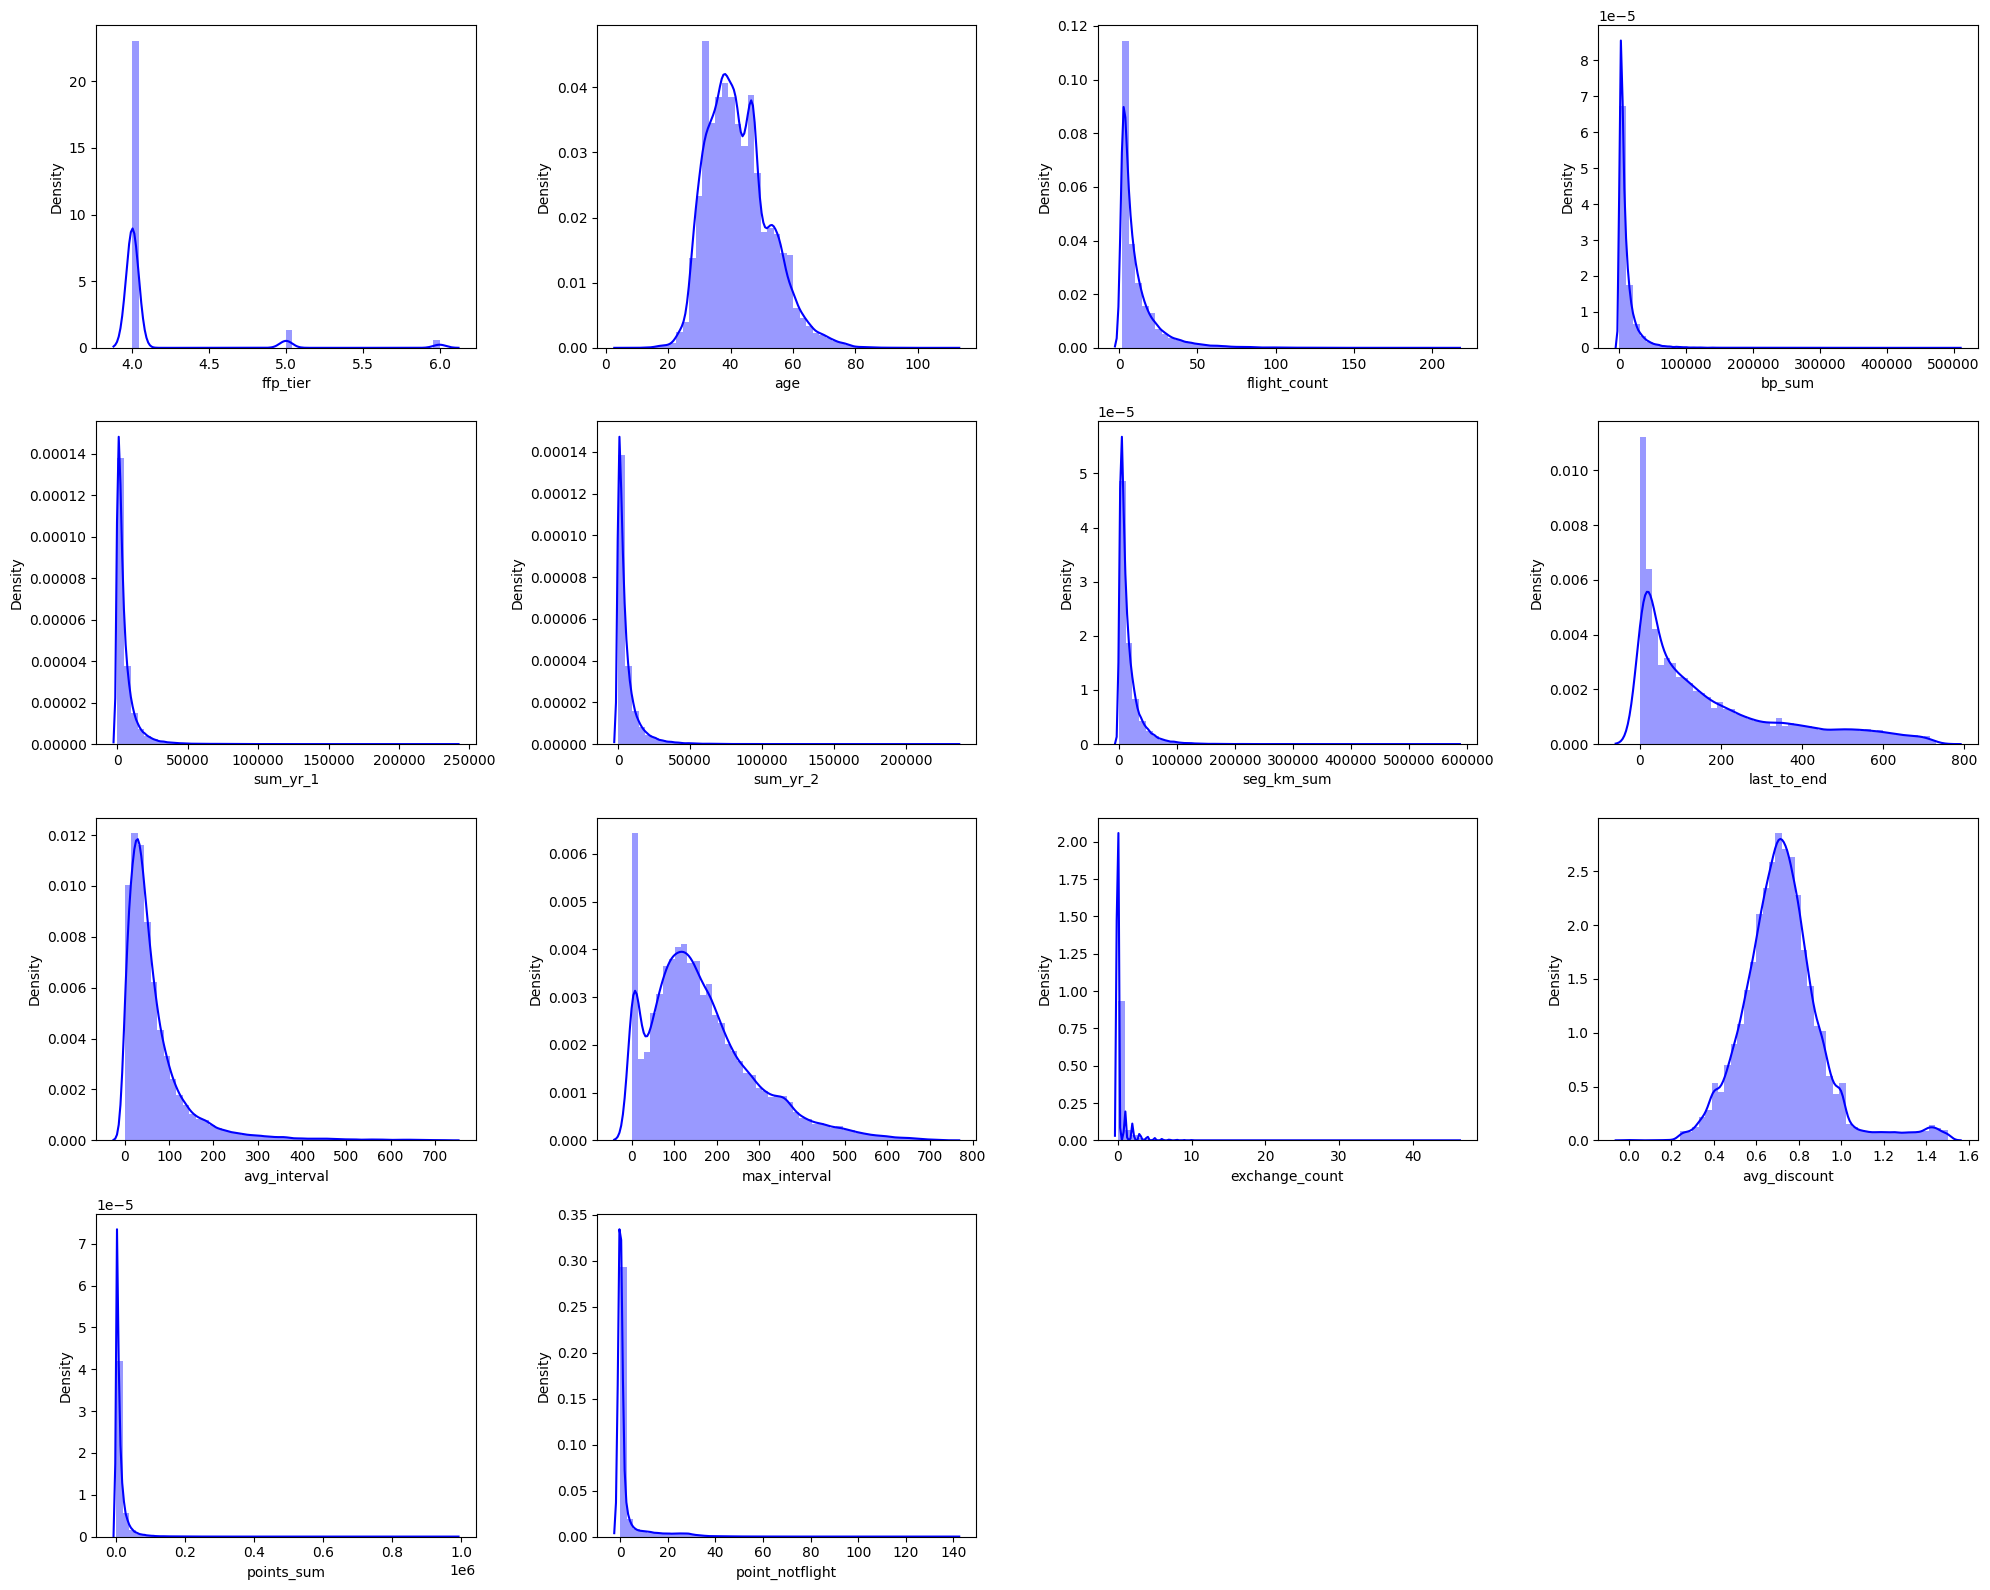

In [17]:
# Graph of Data Distribution

plt.figure(figsize=(20, 16))
for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.distplot(dfraw[num[i]], color='blue')
    plt.tight_layout()

### Outliers

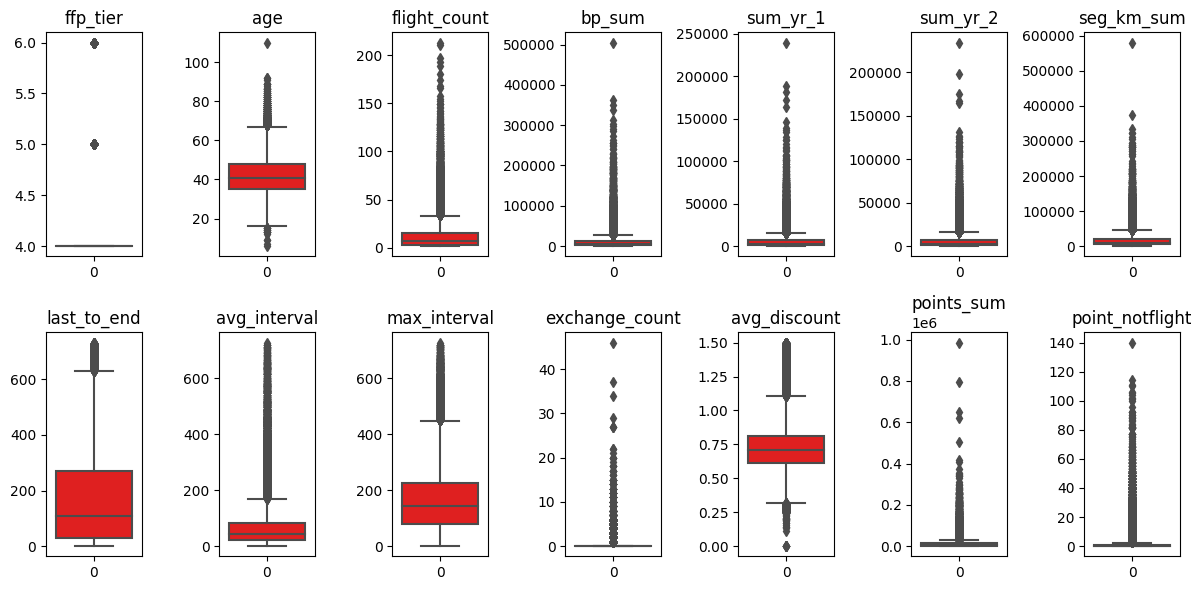

In [18]:
# Checking Outliers
plt.figure(figsize=(12, 6))
for i in range(0, len(num)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(dfraw[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

1. The `ffp_tier` feature basically has no outliers because it only has 3 values, namely 4, 5, and 6.
2. Other features have right-skewed distributions and outliers.
3. Almost all features have outliers. This may be handled by removing extreme values and also proper feature selection.

### Abnormal Value

**1. Avg Discount**

Text(0.5, 1.0, 'Avg Discount')

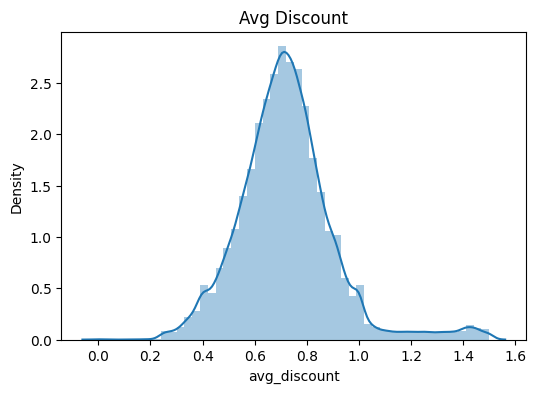

In [19]:
# Creating a Discount Avg Plot that has odd values
plt.figure(figsize=(6, 4))
sns.distplot(dfraw.avg_discount)
plt.title('Avg Discount')

In [20]:
dfraw[dfraw['avg_discount'] > 1.0]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.000,2014-03-31,140,362480,171483.000,167434.000,293678,2014-03-25,7,5.194,17,29,1.252,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.000,2014-03-31,135,351159,163618.000,164982.000,283712,2014-03-21,11,5.299,18,20,1.255,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.000,2014-03-31,23,337314,116350.000,125500.000,281336,2013-12-26,97,27.864,73,11,1.091,372204,12
13,54943,2006-10-25,2007-10-27,Male,6,shenzhen,guangdong,CN,47.000,2014-03-31,118,241614,105466.000,119832.000,179514,2014-03-29,3,6.197,38,14,1.398,270704,20
15,1254,2008-03-28,2008-04-05,Male,4,BOWLAND HEIGHTS,CALIFORNIA,US,63.000,2014-03-31,22,286164,69300.000,54764.000,234721,2014-01-27,65,31.190,102,6,1.026,310002,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60394,47454,2005-11-22,2006-04-25,Female,4,LOWELL,MA,US,49.000,2014-03-31,4,2300,3174.000,0.000,1161,2012-10-28,521,62.000,182,0,1.024,2300,0
61606,51953,2012-08-09,2012-08-09,Male,4,RIYADH,SAUDIA,LA,51.000,2014-03-31,3,1650,2241.000,0.000,822,2012-08-10,600,0.500,1,0,1.166,1650,0
61792,35494,2009-03-05,2010-03-04,Male,4,beijing,beijing,CN,58.000,2014-03-31,2,1250,NaN,0.000,728,2012-07-17,624,3.000,3,0,1.250,1250,0
62168,46131,2007-03-01,2007-05-19,Male,4,NaN,NaN,TW,39.000,2014-03-31,2,869,0.000,1292.000,751,2013-06-05,301,4.000,4,0,1.090,869,0


In [21]:
dfraw[dfraw['avg_discount'] == 0.0]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
62980,1761,2012-08-07,2012-09-09,Female,4,shenzhen,guangdong,CN,29.000,2014-03-31,2,0,0.000,0.000,6138,2012-09-21,558,12.000,12,0,0.000,0,0
62981,15206,2011-12-02,2011-12-02,Female,4,guangzhou,guangdong,CN,42.000,2014-03-31,2,0,0.000,0.000,2158,2013-10-06,178,3.000,3,0,0.000,0,0
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.000,2014-03-31,2,0,0.000,0.000,3848,2013-01-20,437,0.000,0,0,0.000,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.000,2014-03-31,2,0,0.000,0.000,1134,2013-06-09,297,4.000,4,1,0.000,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.000,2014-03-31,4,0,0.000,0.000,8016,2014-01-03,89,37.000,60,14,0.000,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.000,2014-03-31,2,0,0.000,0.000,2594,2014-03-03,29,166.000,166,0,0.000,0,0
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36.000,2014-03-31,2,0,0.000,0.000,3934,2013-02-26,400,12.000,12,0,0.000,0,0
62987,61340,2013-02-17,2013-02-17,Female,4,shanghai,.,CN,29.000,2014-03-31,2,0,NaN,0.000,4222,2013-02-23,403,6.000,6,0,0.000,0,0


Even getting a 100% discount may be rare, especially if you get a discount of more than 100% (read: > 1.0). There are 3684 customers who get a discount >=1. If we assume that the discount was obtained because of the flights they took, then that cannot be said to be true because some of these customers also have low total points and a long distance from the last flight. Therefore, because there are only (2927+8) of the 62k++ data (0.06%) this data will be considered an input error and will be deleted.

The same thing also seems unnatural with an avg_discount of 0, where the total flight (`seg_km_sum`) is not 0 and some have points (`points_sum`). So, this data will be deleted because it is considered unnatural and an input error.

**2. Age**

Text(0.5, 0, 'Age')

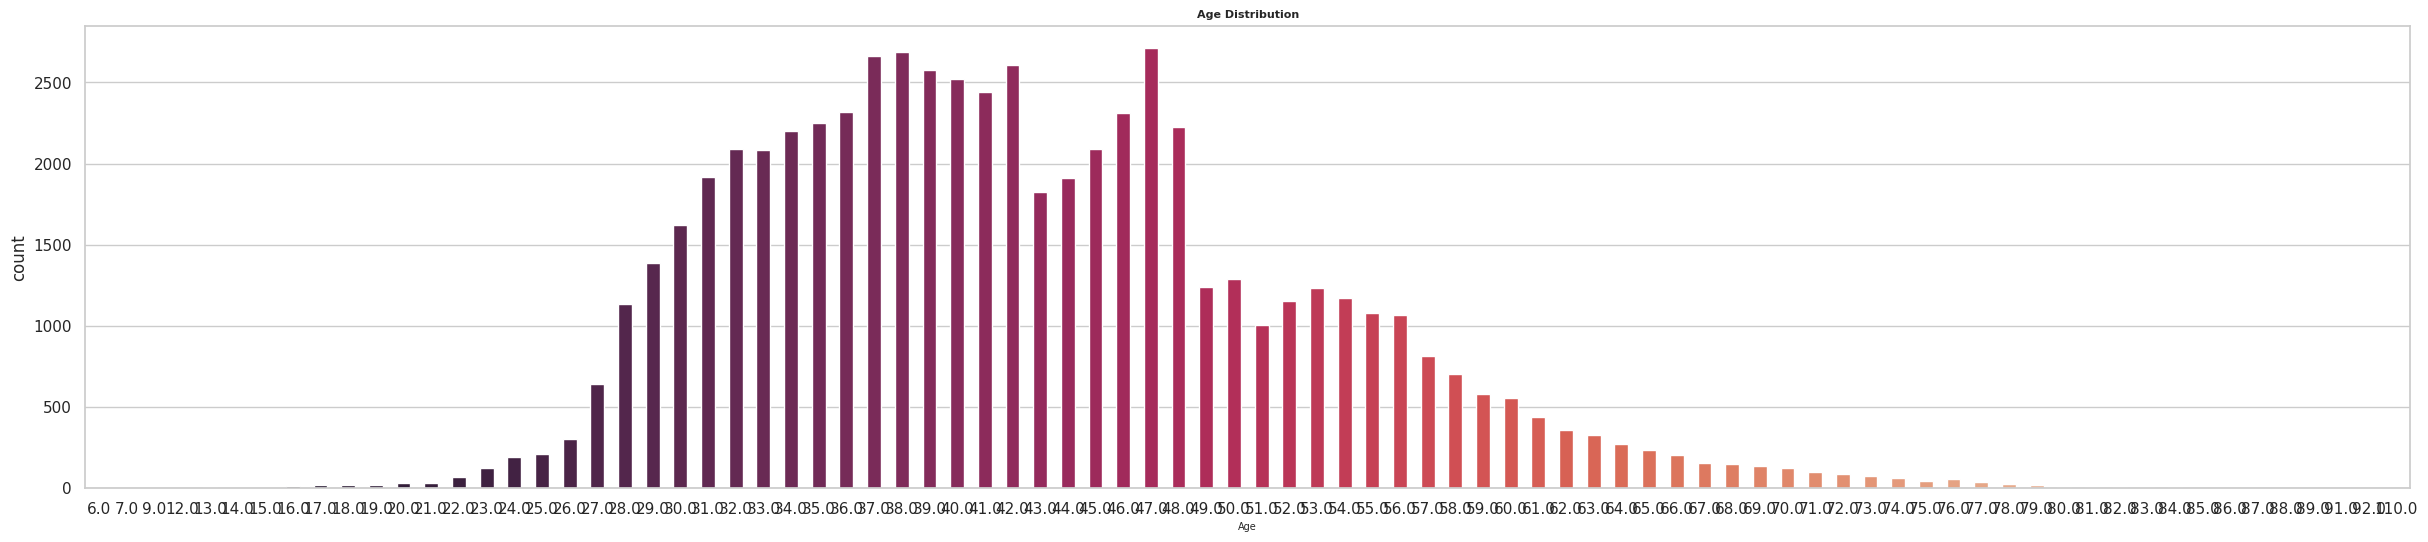

In [22]:
plt.figure(figsize=(30,6))
sns.set(style='whitegrid')
ax = sns.countplot(x='age', width = 0.5, data=dfraw, palette='rocket')
ax.set_title('Age Distribution', fontsize=8, fontweight='bold')
ax.set_xlabel('Age', fontsize=7, fontweight='medium')

In [23]:
dfraw[dfraw.age > 100]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
23268,20264,2005-04-14,2005-05-18,Female,4,shenzhenshi,guangdong,CN,110.000,2014-03-31,7,10895,6117.000,2888.000,14053,2013-04-06,361,50.333,214,1,0.741,11194,3


Customers aged between 28-56 years tend to frequently travel.
However, it is also abnormal if there are customers who are more than 100 years old, so we assume that this is an input error that falls into the outliers category.

**3. Fare Revenue**

In [24]:
dfraw[(dfraw.sum_yr_1 == 0) & (dfraw.sum_yr_2 == 0) & (dfraw.seg_km_sum > 0)]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
4915,41807,2011-09-25,2011-09-25,Male,4,shenyang,liaoning,CN,45.000,2014-03-31,34,31971,0.000,0.000,47521,2013-06-19,287,12.848,54,1,0.725,31971,1
12761,17520,2011-05-02,2011-05-02,Female,4,wulumuqi,xinjiang,CN,57.000,2014-03-31,25,11519,0.000,0.000,33525,2013-09-30,184,18.083,55,0,0.544,12019,1
13382,41298,2011-03-30,2011-04-06,Male,4,dalian,liaoning,CN,44.000,2014-03-31,19,15934,0.000,0.000,19731,2013-08-05,240,26.889,61,3,0.889,15934,3
17337,13275,2009-10-10,2009-10-10,Female,4,shanghai,shanghai,CN,NaN,2014-03-31,17,9542,0.000,0.000,23035,2013-10-19,165,31.938,108,1,0.611,9542,3
18166,35602,2007-09-23,2007-09-23,Male,4,shenyang,liaoning,CN,38.000,2014-03-31,13,11929,0.000,0.000,17615,2013-11-24,129,40.083,162,1,0.765,11929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.000,2014-03-31,2,0,0.000,0.000,3848,2013-01-20,437,0.000,0,0,0.000,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.000,2014-03-31,2,0,0.000,0.000,1134,2013-06-09,297,4.000,4,1,0.000,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.000,2014-03-31,4,0,0.000,0.000,8016,2014-01-03,89,37.000,60,14,0.000,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.000,2014-03-31,2,0,0.000,0.000,2594,2014-03-03,29,166.000,166,0,0.000,0,0


We found another indication of an input error where fare revenue `sum_yr_1`, `sum_yr_2` have a value of 0 even though the passenger traveled `seg_km_sum`. This is certainly abnormal if there is travel but no income. Because there are only 245 of 52931 data (0.004%) data, we will delete them.

## Multivariate Analysis

### Correlation Heatmap

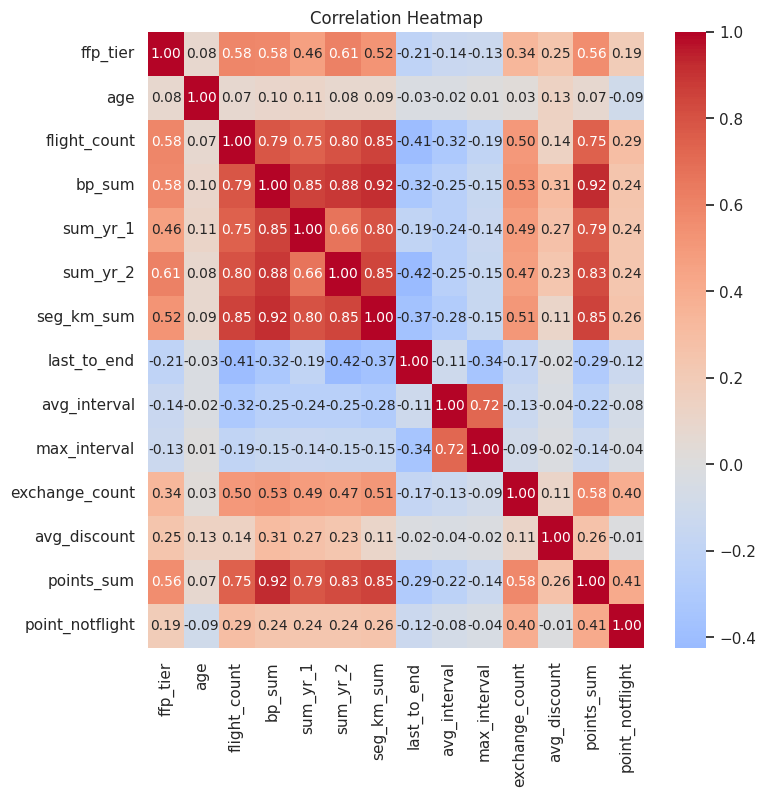

In [25]:
# Correlation Heatmap
corr_matrix = dfraw.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 10}, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. Features `age`, `last_to_end`, `avg_interval`, `max_interval`, `avg_discount`, `point_notflight` have a low correlation with other features (<0.5)
2. Features that have a high correlation are `flight_count`, `bp_sum`, `sum_yr_1`, `sum_yr_2`, `seg_km_sum`, `points_sum`.
3. Features `bp_sum`and `points_sum` are more or less the same, we can say the correlation with `seg_km_sum` implies that customers can gain more points by having larger total mileage.

### Fare Revenue from Flight Count Based on Age

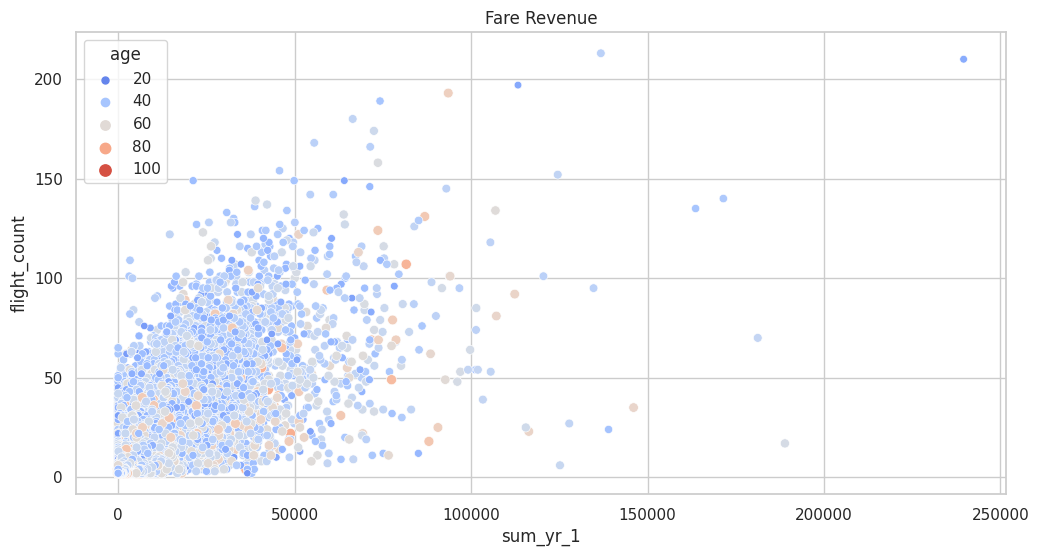

In [26]:
# Visualization of Fare Revenue from Flight Count Based on Age

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=dfraw, x='sum_yr_1', y='flight_count', hue='age', size='age', palette='coolwarm')
plt.title('Fare Revenue')
plt.show()

1. The same as the previous analysis where the age of customers who actively travel is in their 20s and up to 60 years.
2. The amount of fare revenue obtained is also directly proportional to the number of flights carried out.
3. The most common fare revenue is below 50,000.

----------

# Data Preparation

----------

## Data Cleansing

### Dropping

**Duplicated Rows**

In the Data Exploration, it was seen that there were no duplicate rows.

### Rows with Abnormal Value (Outliers)

In the previous stage, we marked features that have abnormal values, so they need to be checked and handled further because they could be indicated as outliers. These values are:
1. `avg_discount` which has a value of 0 and more than 1.
2. `age` which is 110 or more than 100 years old.
3. `sum_yr_1` and `sum_yr_2` which have fare revenue 0.

In [27]:
df_clean = dfraw.copy()
df_clean.head(3)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.000,2014-03-31,210,505308,239560.000,234188.000,580717,2014-03-31,1,3.483,18,34,0.962,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.000,2014-03-31,140,362480,171483.000,167434.000,293678,2014-03-25,7,5.194,17,29,1.252,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.000,2014-03-31,135,351159,163618.000,164982.000,283712,2014-03-21,11,5.299,18,20,1.255,406361,26


In [28]:
# Drop 0 avg_discount
nol_disc = df_clean[((df_clean.avg_discount == 0.0))].index
df_clean = df_clean.drop(nol_disc)

In [29]:
# Drop >1 avg_discount
satu_disc = df_clean[((df_clean.avg_discount > 1.0))].index
df_clean = df_clean.drop(satu_disc)

In [30]:
# Drop >100 age
abn_age = df_clean[((df_clean.age > 100))].index
df_clean = df_clean.drop(abn_age)

In [31]:
# Drop rows
abn_fare = df_clean[(df_clean.sum_yr_1 == 0) & (df_clean.sum_yr_2 == 0) & (df_clean.seg_km_sum > 0)].index
df_clean = df_clean.drop(abn_fare)

In [32]:
df_clean.shape

(59386, 23)

### Handle Missing Value

In [33]:
# Re-checking null value
df_clean.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  1
ffp_tier                0
work_city            2087
work_province        2987
work_country           22
age                   385
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              541
sum_yr_2              134
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

There are 7 features that have Null values, they are `gender`, `work_city`, `work_province`, `work_country`, `age`, `sum_yr_1`, `sum_yr_2`.

1. The `gender` feature which only has 1 null value will be removed.
2. The `work_city`, `work_province`, `work_country` features will be filled with mode values.
2. `age` which has a fairly normal data distribution, will be filled with the mean value.
3. `sum_yr_1` and `sum_yr_2` will be filled with median values.

In [34]:
mode_value = df_clean.filter(['work_city', 'work_province', 'work_country']).mode()
cols = ['work_city', 'work_province', 'work_country']

df_clean[cols] = df_clean[cols].fillna(df_clean.mode().iloc[0])

In [35]:
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].mean())
df_clean['sum_yr_1'] = df_clean['sum_yr_1'].fillna(df_clean['sum_yr_1'].median())
df_clean['sum_yr_2'] = df_clean['sum_yr_2'].fillna(df_clean['sum_yr_2'].median())


In [36]:
df_clean.dropna(axis=0, inplace=True)
df_clean.isnull().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

In [37]:
df_clean['age'] = df_clean['age'].astype(int)

## Feature Engineering

#### Duration of Being a Member

Extracted to find out how long each customer has joined the FFP (Frequent Flyer Program) program by calculating the distance from `load_time` (data taken) and `ffp_date` (when joined).

In [38]:
df_clean['day_as_member'] = (df_clean['load_time'] - df_clean['ffp_date']).dt.days
df_clean.head(2)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,day_as_member
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,210,505308,239560.000,234188.000,580717,2014-03-31,1,3.483,18,34,0.962,619760,50,2706
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,152,273844,124560.000,130702.000,309928,2014-03-27,5,4.788,47,27,0.971,338813,39,1816


In [39]:
df_clean.shape

(59385, 24)

## LRFM ANALYSIS

The Length, Recency, Frequency, and Monetary model, also known as the LRFM model, was introduced as an improved version of the RFM model to identify more relevant and exact consumer groups for profit maximization.

* **Length** it shows how long the customer has been a member <br>
  `day_as_member` : Selected because it tells how many days as member
* **Recency** refers to the last time a user made a transaction <br>
`last_to_end`: Selected because it contains information about the difference in days between the data collection date and the last flight date <br>
* **Frequency** refers to how often customers make transactions <br>
`flight_count` : Selected because it contains data on the number of flights the customer has taken <br>
* **Monetary** value refers to how much each user spends on the entire transaction <br>
`seg_km_sum` : Selected because it contains data on the total flight distance that each customer has traveled which can describe the number of transactions and expenses that have been incurred.  
 `points_sum`: Selected because it contains the number of points owned by each customers which are generally obtained every time they make a transaction

#### Handle Outliers

In [40]:
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    column_name = df.columns[column]
    total_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    percent_outliers = round(((total_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Total Outliers in ', column_name, ' :', total_outliers, ' and outliers percentage:', percent_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('Check the input')

In [41]:
# Checking outliers percentage
column = [10, 14, 16, 21, 23]

for i in range(0, len(column)):
    outlier_del(df_clean, column[i], 'summary')

Total Outliers in  flight_count  : 4689  and outliers percentage: 7.9 %
Total Outliers in  seg_km_sum  : 4486  and outliers percentage: 7.55 %
Total Outliers in  last_to_end  : 1650  and outliers percentage: 2.78 %
Total Outliers in  points_sum  : 4987  and outliers percentage: 8.4 %
Total Outliers in  day_as_member  : 0  and outliers percentage: 0.0 %


In [42]:
# Delete Outlier
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 10, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 14, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 16, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(df_clean, 21, 'df').reset_index()['index'])]

print(f'Total rows after removing outliers: {len(df_clean)}')

Total rows after removing outliers: 49557


### Feature Selection

In [43]:
df_select = df_clean.copy()

In [44]:
df_select = df_select[['flight_count', 'seg_km_sum', 'last_to_end', 'points_sum', 'day_as_member']]
df_select.head(2)

,flight_count,seg_km_sum,last_to_end,points_sum,day_as_member
6879,13,36628,237,19305,2501
7066,18,31278,77,18330,550


## Data Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
feat_std = scaler.fit_transform(df_select)

# Inserting normalization results into DataFrame df std
for i, col in enumerate(df_select):
    df_select['std_' + col] = feat_std[:, i]

In [46]:
df_select.describe()

,flight_count,seg_km_sum,last_to_end,points_sum,day_as_member,std_flight_count,std_seg_km_sum,std_last_to_end,std_points_sum,std_day_as_member
count,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000,49557.000
mean,7.508,10375.852,197.660,6310.093,1419.359,0.000,-0.000,0.000,-0.000,0.000
std,5.826,7785.334,184.374,4986.563,825.958,1.000,1.000,1.000,1.000,1.000
min,2.000,368.000,1.000,0.000,365.000,-0.946,-1.285,-1.067,-1.265,-1.277
25%,3.000,4175.000,44.000,2348.000,699.000,-0.774,-0.796,-0.833,-0.795,-0.872
50%,6.000,7989.000,136.000,4807.000,1197.000,-0.259,-0.307,-0.334,-0.301,-0.269
75%,10.000,14781.000,308.000,9181.000,2088.000,0.428,0.566,0.598,0.576,0.810
max,30.000,36650.000,700.000,21364.000,3437.000,3.861,3.375,2.725,3.019,2.443


In [47]:
df_std = df_select.copy()
df_std.drop(columns= ['last_to_end', 'flight_count', 'seg_km_sum', 'day_as_member', 'points_sum'], inplace= True)
df_std.head(3)

,std_flight_count,std_seg_km_sum,std_last_to_end,std_points_sum,std_day_as_member
6879,0.943,3.372,0.213,2.606,1.310
7066,1.801,2.685,-0.654,2.410,-1.053
7077,2.316,3.173,-0.378,2.776,-0.692


------------

# Clustering

------------

## Inertia Check

Text(0.5, 1.0, 'Visualization of Inertia')

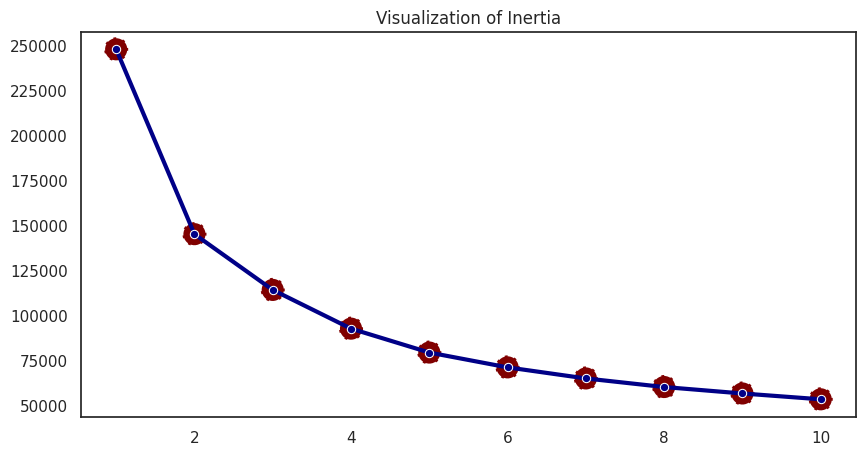

In [48]:
from sklearn.cluster import KMeans

# Calculates inertia values for 2 to 10 clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)


# Visualize inertia
sns.set_style('white')
plt.figure(figsize= (10, 5))
sns.lineplot(x= range(1, 11), y= inertia, marker='o', color = '#000087', linewidth = 3)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Visualization of Inertia')

In [49]:
# See the difference in inertia percentage for each additional cluster

((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100).dropna()

0   41.371
1   21.282
2   18.778
3   14.277
4   10.327
5    8.595
6    7.292
7    5.914
8    5.676
dtype: float64

## Silhouette Score

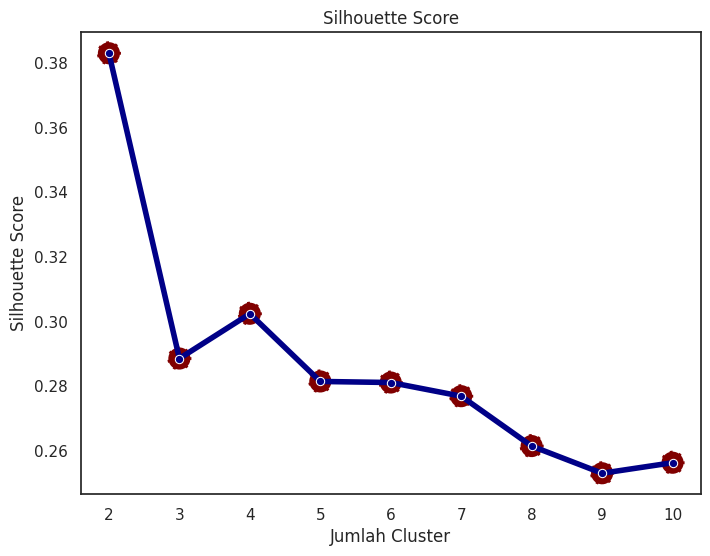

In [50]:
from sklearn.metrics import silhouette_score

# Silhouette score for 2 to 10 clusters
range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std)
    cluster_labels = kmeans.predict(df_std)

    score_euclidean = silhouette_score(df_std, cluster_labels, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

# Plot Silhouette Score
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean,  marker='o', color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

From the Silhouette score results above, it can be seen that the optimal number of clusters is 4 clusters.

## Cluster Evaluation

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std)

clusters = kmeans.labels_

In [52]:
# PCA and Visualization of Clusters

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,3.793,0.809
1,3.842,-1.493
2,4.521,-1.233
3,4.421,-0.366
4,4.239,-1.121


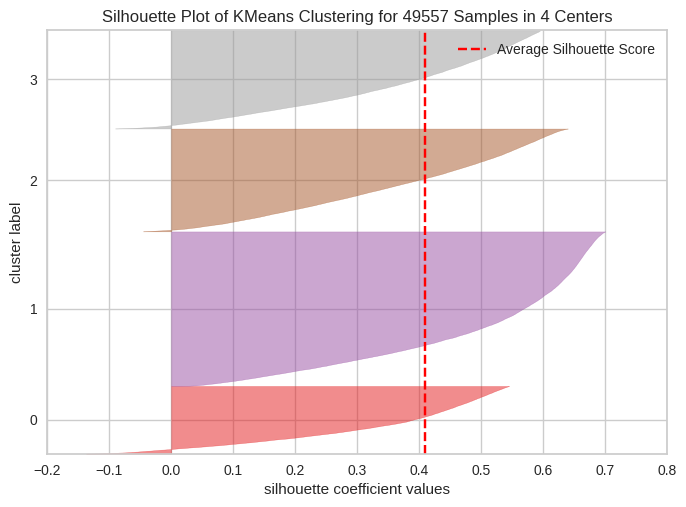

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 49557 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
# Visualize the Clusters Using Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_pca)
visualizer.show()

From the picture above, it can be seen that all clusters have good coefficient values. This means that the model created is very ideal.

In [54]:
df_pca['clusters'] = clusters
df_pca.sample(5)

,PC 1,PC 2,clusters
38264,-1.537,0.216,2
28221,-0.256,-0.486,0
38862,-1.137,0.393,2
13000,0.536,0.100,2
16934,0.669,-0.030,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

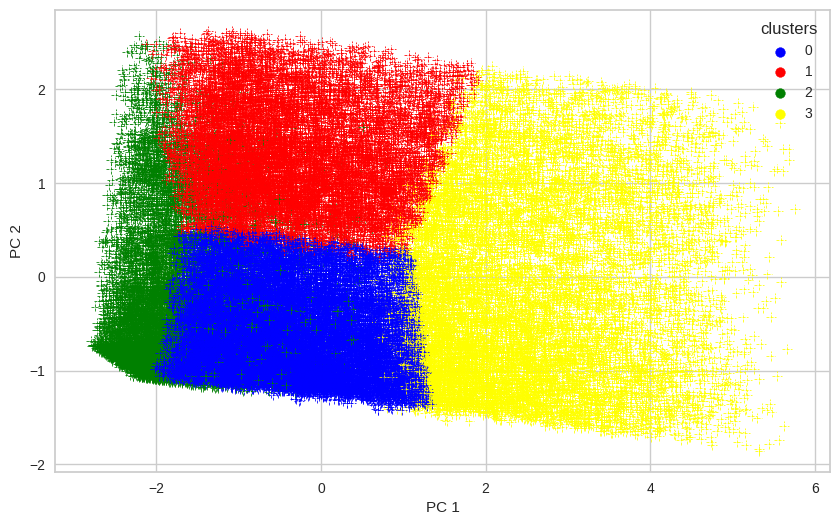

In [55]:
# Visualization of cluster distribution

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    marker = '+',
    palette=['blue','red','green','yellow'],
    s=50,
    ax=ax
)

**Assign CLuster Label to the Original Dataset**

In [56]:
# Assign cluster to dataset
df_clean.loc[:,'clusters'] = kmeans.labels_
df_clean.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,day_as_member,clusters
36200,62030,2012-04-30,2012-04-30,Female,4,shenyang,liaoning,CN,30,2014-03-31,8,4537,1852.000,3770.000,8366,2014-02-15,46,93.714,300,0,0.668,4537,0,700,0
51058,7472,2013-01-15,2013-11-07,Male,4,daqing,heilongjiang,CN,52,2014-03-31,3,1838,0.000,2368.000,4957,2014-01-04,88,29.000,56,0,0.523,1838,0,440,0
36936,34266,2012-12-23,2012-12-23,Male,4,guangzhou,guangdong,HK,36,2014-03-31,6,3975,2163.000,1934.000,8929,2014-02-26,35,86.000,327,0,0.603,3975,0,463,0
30810,49654,2010-05-12,2010-05-20,Male,4,guangzhou,guangdong,CN,27,2014-03-31,9,6293,1836.000,5154.000,10237,2014-02-03,58,71.125,295,0,0.704,6293,0,1419,0
54246,24999,2012-08-25,2012-08-25,Male,4,QUEZON CITY,guangdong,PH,37,2014-03-31,3,1518,1200.000,1200.000,3461,2013-07-13,263,161.000,207,0,0.614,1518,0,583,0


In [57]:
df_clean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

,clusters,total_members
0,0,16716
1,3,11543
2,2,10849
3,1,10449


In [58]:
# Show the statistics of each cluster
df_select['clusters'] = clusters
display(df_select.groupby('clusters').agg(['min', 'max','mean','median']))

flight_count                   seg_km_sum                             \
                  min max   mean median        min    max      mean    median   
clusters                                                                        
0                   2  20  5.729  5.000        368  28608  7785.268  7205.500   
1                   2  24  5.608  5.000        368  26210  7750.332  7086.000   
2                   2  16  3.268  3.000        368  30250  4839.502  3941.000   
3                   2  30 15.791 15.000       4048  36650 21707.579 21008.000   

         last_to_end                      points_sum                   \
                 min  max    mean  median        min    max      mean   
clusters                                                                
0                  1  427 122.287 108.000          0  21331  4730.422   
1                  1  648 146.894 122.000          0  20947  4576.885   
2                223  700 483.086 484.000          0  21350  2914.052   
3                  1  696  84.500  49.000        413  21364 13358.498   

                   day_as_member                         std_flight_count  \
            median           min   max     mean   median              min   
clusters                                                                    
0         4270.500           365  1700  859.720  796.000           -0.946   
1         4021.000          1617  3437 2450.115 2403.000           -0.946   
2         2215.000           365  3429 1165.617  966.000           -0.946   
3        13003.000           365  3437 1535.222 1390.000           -0.946   

                             std_seg_km_sum                      \
           max   mean median            min   max   mean median   
clusters                                                          
0        2.144 -0.305 -0.431         -1.285 2.342 -0.333 -0.407   
1        2.831 -0.326 -0.431         -1.285 2.034 -0.337 -0.423   
2        1.458 -0.728 -0.774         -1.285 2.553 -0.711 -0.827   
3        3.861  1.422  1.286         -0.813 3.375  1.456  1.366   

         std_last_to_end                     std_points_sum               \
                     min   max   mean median            min   max   mean   
clusters                                                                   
0                 -1.067 1.244 -0.409 -0.486         -1.265 3.012 -0.317   
1                 -1.067 2.443 -0.275 -0.410         -1.265 2.935 -0.348   
2                  0.137 2.725  1.548  1.553         -1.265 3.016 -0.681   
3                 -1.067 2.703 -0.614 -0.806         -1.183 3.019  1.413   

                std_day_as_member                      
         median               min   max   mean median  
clusters                                               
0        -0.409            -1.277 0.340 -0.678 -0.755  
1        -0.459             0.239 2.443  1.248  1.191  
2        -0.821            -1.277 2.433 -0.307 -0.549  
3         1.342            -1.277 2.443  0.140 -0.036

## About the Clusters

The explanation of each cluster is as follows:

#### Cluster 0 :
Customers in this cluster are more likely to take a stable number of flights with an average of 5–6 flights over relatively short distances and an average of 122 points. This cluster has a membership period that is not too long or can be said to have just joined among other cluster customers.

#### Cluster 1:
Customers in this cluster have characteristics like cluster 0, but the average points obtained are higher than cluster 0, that is 146 points. Customers who are members of this cluster are also not old members or can be said to have just joined. Maybe because there is only a small amount of data recorded (flight data since the program was input) which is why clusters 0 and 1 still don't have a high number of flights.
These two clusters have the potential to be upgraded more because the number of flights they have is quite good even though they have just joined.

#### Cluster 2:
Customers belonging to cluster 2 are those who make fewer travels over relatively short distances, but have high points. In addition, they have joined  the program longer than clusters 0 and 1. This means they have good loyalty because they continue to join the membership but rarely travel.

#### Cluster 3:
The best customers are customers in cluster 3. This cluster has a higher number of flights than other clusters with an average of 15-16 flights over long distances. It is likely that this cluster's customers often travel internationally. Apart from that, the number of points they get is also high because they have been members for a long time.

## Business Recommendation

### Cluster 0 dan 1 (Potential Customers)  
Because clusters 0 and 1 are potential customers where they often travel even though they have just joined as members, the focus of increasing revenue is to retain them so they continue to be members and provide attractive rewards so they continue to travel frequently. So the business recommendations are:  
**1. Birthday Coupon**  
Providing discounts on flights in customers' birthday months of up to 10% according to the number of points they get. Another advantage is that if they travel on their birthday, they will get double points.  
**2. Points Redemption**  
Every customer who has reached a certain number of points has the opportunity to redeem their points for shopping coupons or lodging coupons at company partners.  
**3. Tour Package Affiliates**  
Offers an affiliate program where customers who succeed in bringing at least 4 people to become members will get a discount on the price of the tour package with the people they invite.   

### Cluster 2 (Loyal Customers)  
Because cluster 2 is a cluster where customers have been members for a long time but rarely travel, our focus is on how to get them to travel frequently. Some business recommendations are:  
**1. Inactive Treatment**  
Customers who have not traveled for up to 6 months will be given a special offer if they travel between the specified time limits, then they will get a 10% discount and double points. This aims to minimize inactive customers.  
**2. Couple Package**  
Create a special travel package for 2 people with your partner, friends or others. Each of them will get a 5% discount and double points. This aims to ensure that many passengers travel every day.  
**3. Tour Package**  
Special offer for those who travel and want to have recreation. They will get special discounts and good service from company partners.  

### Cluster 3 (Exclusive Customers)  
Of course, customers in cluster 3 are exclusive customers who must be looked after well. They spend money on the company so the focus of increasing business is to keep them using our flights. Some business recommendations are:  
**1. First Priority**  
Make customers of this cluster a top priority, such as priority seats, free food and drinks, and bigger discounts than other clusters.  
**2. Luxury Service**  
Luxury international travel promotions. Offer luxury travel packages with premium amenities such as five-star accommodations, first-class flights and personalized personal service.  
**3. Half Price Refund**  
The special advantage that this cluster has apart from priority and luxury service is the opportunity to get a 100% refund on the same day with a certain minimum number of points.

### For all clusters  
**1. Developing mobile applications**   
Developing mobile applications to make it easier for customers to access flight information, points and exclusive offers that can only be optimally used through the application.   
**2. Gamification**  
Give class upgrades or special facilities to customers who have reached certain points to be able to enjoy promos or small discounts.  
**3. Seasons Promotion**  
Plan seasonal promotions that align with holidays and special events, such as religious holiday discounts, special New Year's offers, or other holidays.